In [2]:
from matplotlib import pyplot as plt

def subplots_3D(nrows=1, ncols=1, projection="ortho"):
    """Like subplots, but """
    # TODO: maybe this could be a nice contribution to matplotlib?

    fig = plt.figure()
    axes = []
    for i in range(1, ncols * nrows + 1):
        plot_id = ncols * 100 + nrows * 10 + i
        ax = fig.add_subplot(plot_id, projection="3d")
        axes.append(ax)
    for ax in axes:
        ax.set_proj_type(projection)
    if len(axes) == 1:
        axes = axes.pop(0)

    return fig, axes

In [42]:
import numpy as np
p1 = np.array([0, 0, 0])
p2 = np.array([1, 1, 0])
p2 = p2 / np.linalg.norm(p2)

p3 = p2 * 0.5 + np.array([0, 0, np.sqrt(3) / 2])
# p3 = p3 / np.linalg.norm(p3)

In [43]:
# %matplotlib qt
%matplotlib inline

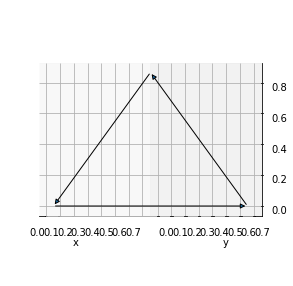

In [48]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D, proj3d
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)
with plt.rc_context({"figure.figsize": (5, 5)}):
    fig, ax = subplots_3D(1, 1)
    ax.autoscale(True, tight=True)

    a1 = Arrow3D(*list(zip(p1, p2)), mutation_scale=10, lw=1, arrowstyle="-|>")
    a2 = Arrow3D(*list(zip(p2, p3)), mutation_scale=10, lw=1, arrowstyle="-|>")
    a3 = Arrow3D(*list(zip(p3, p1)), mutation_scale=10, lw=1, arrowstyle="-|>")
    ax.add_artist(a1)
    ax.add_artist(a2)
    ax.add_artist(a3)
    # dirty hack to make autoscale work properly
    ax.scatter(*p1, s=1.0e-6)
    ax.scatter(*p2, s=1.0e-6)
    ax.scatter(*p3, s=1.0e-6)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.view_init(0, -45)

# Find appropriate view angle


* calculate view angle (azimuth) from $R_z$.
* We want to have the lower triangle arrow as the x-axis of the new view. This means that we need to place the view orthogonally to the view angle.
* $\alpha_{view} = \alpha - 90$
* The problem is that currently, for 3D axes, the `set_aspect("equal")` method is not correctly implemented, which is why we need to hack around this a little bit

In [60]:
def set_axes_3D_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.
    

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    
    https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

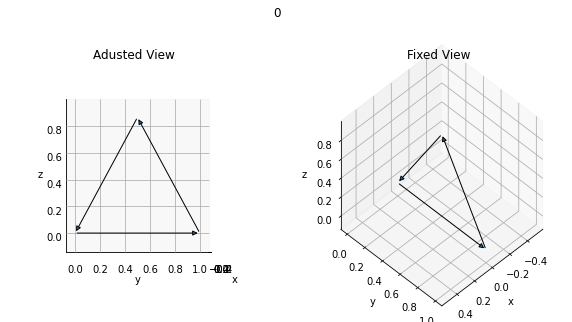

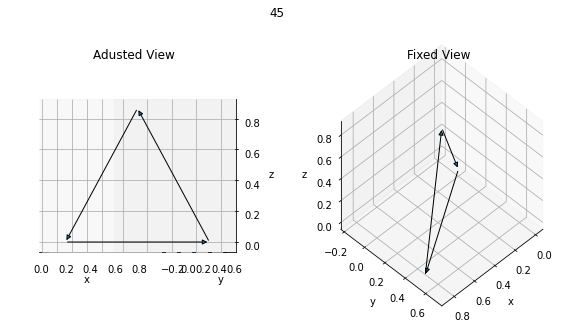

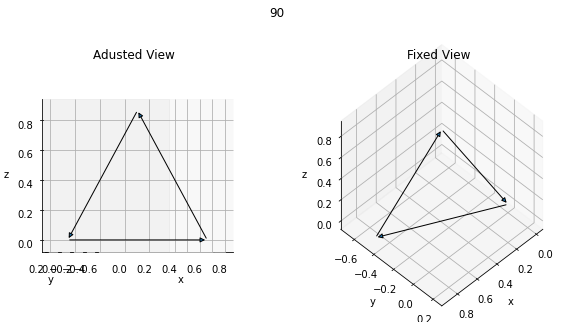

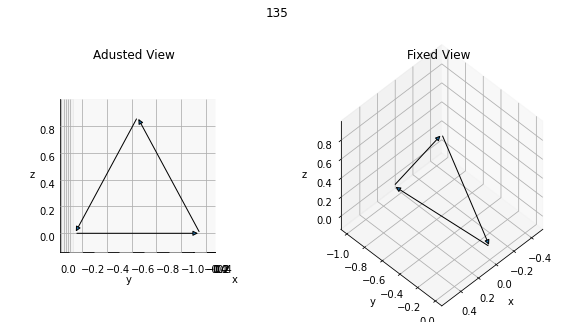

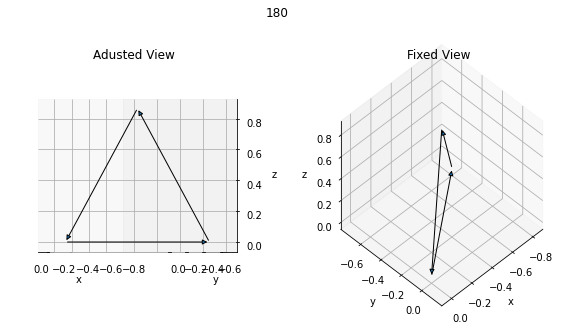

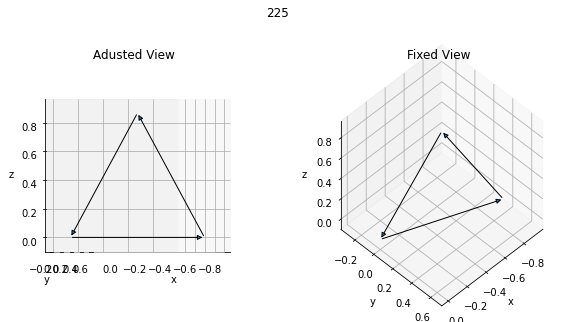

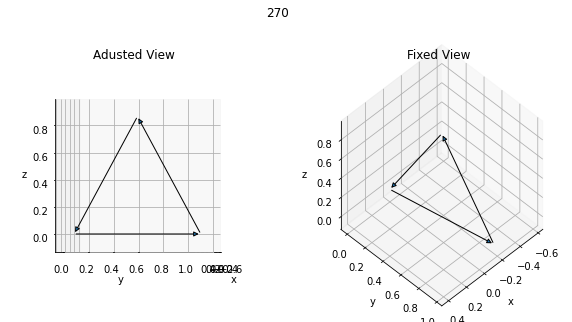

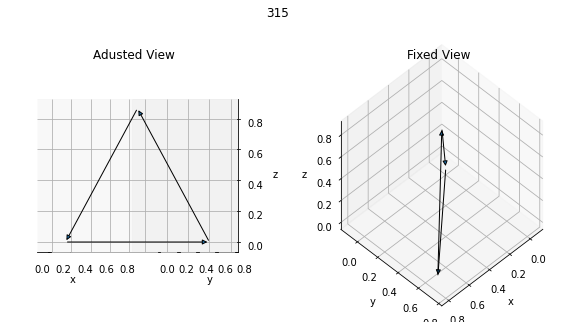

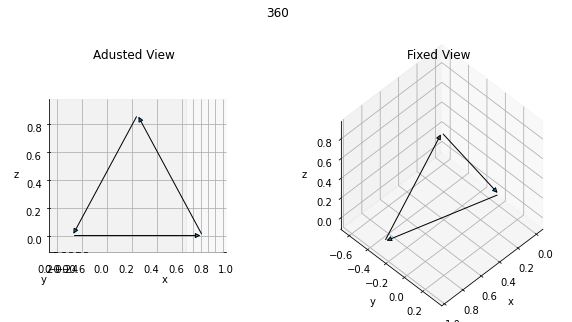

In [63]:
for alpha in np.linspace(0, 360, 9):
    p1 = np.array([0, 0, 0])
    p2 = np.array([np.sin(alpha), np.cos(alpha), 0])
    p2 = p2 / np.linalg.norm(p2)

    p3 = p2 * 0.5 + np.array([0, 0, np.sqrt(3) / 2])
    with plt.rc_context({"figure.figsize": (10, 5)}):
        fig, axes = subplots_3D(2, 1)
        ax1, ax2 = axes
        for ax in axes:
            ax.autoscale(True, tight=True)
            a1 = Arrow3D(*list(zip(p1, p2)), mutation_scale=10, lw=1, arrowstyle="-|>")
            a2 = Arrow3D(*list(zip(p2, p3)), mutation_scale=10, lw=1, arrowstyle="-|>")
            a3 = Arrow3D(*list(zip(p3, p1)), mutation_scale=10, lw=1, arrowstyle="-|>")
            ax.add_artist(a1)
            ax.add_artist(a2)
            ax.add_artist(a3)
            # dirty hack to make autoscale work properly
            # artists are not registered as data points, so we need some manual adjustment
            ax.scatter(*p1, s=1.0e-6)
            ax.scatter(*p2, s=1.0e-6)
            ax.scatter(*p3, s=1.0e-6)
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("z")
            set_axes_3D_equal(ax)
        alpha_view = np.arctan2(p2[1], p2[0]) * 180 / np.pi
        ax1.view_init(0, alpha_view - 90)
        ax2.view_init(45, 45)
        ax1.set_title("Adusted View")
        ax2.set_title("Fixed View")
        fig.suptitle(f"{alpha:.0f}")

# Final notes

* note that although the viewing direction is now set as intended, the size of the projected shape is not the same.
* This is because the axes size on the canvas changes, which needs to be adjusted using the distance of the camera from the origin